### In this notebook

1. Preparing the dataset for Principal Component Analysis: excluding goalkeepers and players having less than 9 matches completed (810 minutes), excluding features having a linear correlation coefficient of 90% or above
2. Conducting the Principal Component Analysis: choosing the proper number of PCs and interpreting them
3. Preparing the dataset for clustering: appending the PCs values to the main dataset and exporting it

### Importing necessary libraries and setting the option to display all columns and rows in a dataframe

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importing the pre-process dataset

In [46]:
df = pd.read_csv('df.csv')

print(df.shape)
df.head()

(2822, 111)


,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,CrdY/90,CrdR/90,G/90,A/90,(G+A)/90,PKatt,PK,(G-PK)/90,(G+A-PK)/90,xG/90,xA/90,(xG+xA)/90,npxG/90,(npxG+xA)/90,(G-xG)/90,(np:G-xG)/90,Sh/90,SoT/90,PassAtt/90,Prog/90,Cmp%,ShortAtt/90,MedAtt/90,LongAtt/90,(A-xA)/90,KP/90,(1/3)/90,PPA/90,CrsPA/90,LiveAtt/90,DeadAtt/90,(PassAtt:FK)/90,(PassAtt:CK)/90,(PassAtt:TI)/90,TB/90,UndPress/90,Sw/90,Crs/90,GroundAtt%,LowAtt%,HighAtt%,LeftAtt%,RightAtt%,HeadAtt%,OtherAtt%,Off%,Out%,OppInt%,OppBlk%,SCA/90,(SCA:Live)/90,(SCA:Dead)/90,(SCA:Drib)/90,(SCA:Sh)/90,(SCA:Fld)/90,(SCA:Def)/90,GCA/90,(GCA:Live)/90,(GCA:Dead)/90,(GCA:Drib)/90,(GCA:Sh)/90,(GCA:Fld)/90,(GCA:Def)/90,Tkl/90,TklW/90,(Tkl:Def)/90,(Tkl:Mid)/90,(Tkl:Att)/90,DriTkl/90,DriTklW/90,Press/90,SuccPress/90,(Press:Def)/90,(Press:Mid)/90,(Press:Att)/90,Blk/90,Blk:Sh/90,Blk:ShoT/90,Int/90,(Tkl+Int)/90,Clr/90,Tch/90,TchDef:Pen%,Tch:Def%,Tch:Mid%,Tch:Att%,TchAtt:Pen%,Tch:Live%,Dri/90,DriW%,Carries/90,CarrAvgDist,PCarrDist%,PCarries/90,(1/3 Carr)/90,CPA/90,Mis/90,Dis/90,Targ/90,Rec%,Rec:Prog%
0,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,2,0,11,0.1,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,100.0,0.00,10.00,10.00,0.00,0.00,0.00,0.00,0.0,20.00,0.00,0.00,0.0,0.00,0.0,0.00,10.00,0.00,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,10.00,0.00,20.00,0.00,10.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,50.00,NaN,80.0,20.0,0.0,NaN,80.0,0.00,NaN,20.00,5.00,40.0,0.00,0.00,0.00,0.00,0.00,30.00,33.3,0.0
1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,22,20,1777,19.7,0.10,0.00,0.00,0.05,0.05,0,0,0.00,0.05,0.06,0.04,0.10,0.06,0.10,-0.06,-0.06,0.91,0.30,57.21,5.69,78.9,25.99,21.17,7.72,0.01,0.56,3.45,1.32,0.2,47.31,9.90,1.83,0.1,7.97,0.1,5.69,1.02,1.73,63.6,19.4,16.9,65.9,17.2,2.2,0.3,1.1,2.0,2.6,3.0,1.32,1.12,0.15,0.05,0.00,0.0,0.0,0.15,0.1,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,2.13,0.76,10.46,3.50,6.60,2.84,1.02,1.57,0.36,0.05,1.73,3.40,2.03,70.66,11.0,29.1,46.2,24.7,11.0,80.9,1.07,42.9,37.21,4.80,54.1,5.79,1.52,0.46,0.66,0.81,42.39,92.8,5.9
2,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,2,0,18,0.2,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.00,5.00,86.7,35.00,30.00,10.00,0.00,0.00,5.00,0.00,0.0,60.00,15.00,0.00,0.0,15.00,0.0,0.00,0.00,0.00,66.7,26.7,6.7,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,0.00,5.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,95.00,12.5,26.3,31.6,42.1,12.5,78.9,10.00,50.0,55.00,4.27,85.1,10.00,5.00,0.00,0.00,5.00,60.00,91.7,18.2
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,33,33,2889,32.1,0.12,0.03,0.09,0.00,0.09,0,0,0.09,0.09,0.05,0.01,0.06,0.05,0.06,0.04,0.04,0.47,0.16,53.43,2.83,87.8,11.74,29.63,11.40,-0.01,0.12,2.52,0.03,0.0,51.59,1.84,1.84,0.0,0.00,0.0,5.23,1.21,0.00,79.6,7.2,13.2,66.2,27.7,3.3,0.2,0.2,1.5,1.4,0.8,0.34,0.31,0.00,0.00,0.03,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,2.21,1.40,1.59,0.62,0.00,1.15,0.47,11.81,4.55,7.85,3.43,0.53,1.59,0.62,0.06,1.74,3.96,5.30,69.47,51.2,53.9,44.2,1.8,51.2,91.0,0.62,60.0,41.71,5.65,55.4,1.81,0.25,0.03,0.25,0.47,43.83,97.0,0.5
4,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,3,0,60,0.7,1.43,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.14,1.43,58.3,2.86,7.14,4.29,0.00,0.00,0.00,1.43,0.0,17.14,0.00,0.00,0.0,0.00,0.0,10.00,1.43,1.43,66.7,0.0,33.3,8.3,83.3,8.3,0.0,0.0,8.3,8.3,8.3,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.43,0.00,0.00,1.43,0.00,1.43,0.00,22.86,5.71,7.14,11.43,4.29,0.00,0.00,0.00,1.43,2.86,1.43,27.14,0.0,10.5,57.9,31.6,0.0,89.5,4.29,33.3,15.71,4.18,47.8,1.43,1.43,0.00,0.00,0.00,14.29,80.0,12.5


### Removing GKs and players having less than 810 minutes played

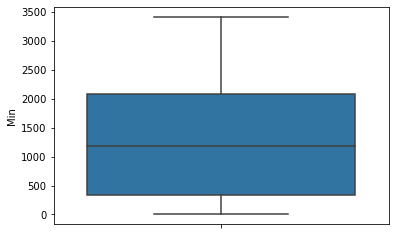

In [47]:
#Plotting the distribution of minutes played

sns.boxplot(y='Min', data=df)
plt.show()

In [48]:
df = df[df['Pos']!='GK']
df = df[df['Min']>810]
df.fillna(0, inplace=True)
print(df.shape)
df.head()

(1582, 111)


,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,CrdY/90,CrdR/90,G/90,A/90,(G+A)/90,PKatt,PK,(G-PK)/90,(G+A-PK)/90,xG/90,xA/90,(xG+xA)/90,npxG/90,(npxG+xA)/90,(G-xG)/90,(np:G-xG)/90,Sh/90,SoT/90,PassAtt/90,Prog/90,Cmp%,ShortAtt/90,MedAtt/90,LongAtt/90,(A-xA)/90,KP/90,(1/3)/90,PPA/90,CrsPA/90,LiveAtt/90,DeadAtt/90,(PassAtt:FK)/90,(PassAtt:CK)/90,(PassAtt:TI)/90,TB/90,UndPress/90,Sw/90,Crs/90,GroundAtt%,LowAtt%,HighAtt%,LeftAtt%,RightAtt%,HeadAtt%,OtherAtt%,Off%,Out%,OppInt%,OppBlk%,SCA/90,(SCA:Live)/90,(SCA:Dead)/90,(SCA:Drib)/90,(SCA:Sh)/90,(SCA:Fld)/90,(SCA:Def)/90,GCA/90,(GCA:Live)/90,(GCA:Dead)/90,(GCA:Drib)/90,(GCA:Sh)/90,(GCA:Fld)/90,(GCA:Def)/90,Tkl/90,TklW/90,(Tkl:Def)/90,(Tkl:Mid)/90,(Tkl:Att)/90,DriTkl/90,DriTklW/90,Press/90,SuccPress/90,(Press:Def)/90,(Press:Mid)/90,(Press:Att)/90,Blk/90,Blk:Sh/90,Blk:ShoT/90,Int/90,(Tkl+Int)/90,Clr/90,Tch/90,TchDef:Pen%,Tch:Def%,Tch:Mid%,Tch:Att%,TchAtt:Pen%,Tch:Live%,Dri/90,DriW%,Carries/90,CarrAvgDist,PCarrDist%,PCarries/90,(1/3 Carr)/90,CPA/90,Mis/90,Dis/90,Targ/90,Rec%,Rec:Prog%
1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,22,20,1777,19.7,0.10,0.00,0.00,0.05,0.05,0,0,0.00,0.05,0.06,0.04,0.10,0.06,0.10,-0.06,-0.06,0.91,0.30,57.21,5.69,78.9,25.99,21.17,7.72,0.01,0.56,3.45,1.32,0.20,47.31,9.90,1.83,0.10,7.97,0.10,5.69,1.02,1.73,63.6,19.4,16.9,65.9,17.2,2.2,0.3,1.1,2.0,2.6,3.0,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.00,0.00,0.00,1.68,0.96,1.07,0.56,0.05,2.13,0.76,10.46,3.50,6.60,2.84,1.02,1.57,0.36,0.05,1.73,3.40,2.03,70.66,11.0,29.1,46.2,24.7,11.0,80.9,1.07,42.9,37.21,4.80,54.1,5.79,1.52,0.46,0.66,0.81,42.39,92.8,5.9
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,33,33,2889,32.1,0.12,0.03,0.09,0.00,0.09,0,0,0.09,0.09,0.05,0.01,0.06,0.05,0.06,0.04,0.04,0.47,0.16,53.43,2.83,87.8,11.74,29.63,11.40,-0.01,0.12,2.52,0.03,0.00,51.59,1.84,1.84,0.00,0.00,0.00,5.23,1.21,0.00,79.6,7.2,13.2,66.2,27.7,3.3,0.2,0.2,1.5,1.4,0.8,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.21,1.40,1.59,0.62,0.00,1.15,0.47,11.81,4.55,7.85,3.43,0.53,1.59,0.62,0.06,1.74,3.96,5.30,69.47,51.2,53.9,44.2,1.8,51.2,91.0,0.62,60.0,41.71,5.65,55.4,1.81,0.25,0.03,0.25,0.47,43.83,97.0,0.5
5,Mehdi Abeid,ALG,MF,Nantes,Ligue 1,27,18,15,1320,14.7,0.34,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.07,0.05,0.12,0.07,0.12,-0.07,-0.07,1.36,0.00,49.32,2.86,85.0,17.89,19.32,10.48,-0.05,0.82,4.08,0.48,0.27,45.99,3.33,2.18,0.95,0.20,0.07,5.65,2.24,1.43,75.0,9.7,15.3,13.8,81.2,2.6,0.6,0.7,2.1,1.4,1.0,1.91,1.22,0.27,0.14,0.00,0.14,0.14,0.07,0.07,0.00,0.0,0.00,0.00,0.00,2.52,1.63,1.09,1.22,0.20,1.70,0.75,16.67,5.78,5.10,9.05,2.52,1.22,0.14,0.00,1.56,4.08,0.95,64.49,7.5,23.5,58.1,18.4,7.5,87.0,2.18,71.9,40.48,5.86,48.5,4.08,1.50,0.07,0.41,1.22,42.72,90.0,2.5
6,Laurent Abergel,FRA,MF,Lorient,Ligue 1,27,38,32,2963,32.9,0.15,0.00,0.09,0.03,0.12,0,0,0.09,0.12,0.04,0.04,0.08,0.04,0.08,0.05,0.05,0.91,0.30,48.39,3.37,83.5,18.33,19.42,8.78,-0.01,0.64,3.43,0.52,0.12,46.99,1.40,1.12,0.03,0.21,0.06,9.70,1.61,0.55,73.7,12.4,13.8,8.6,87.4,2.8,0.3,0.3,1.8,3.1,1.8,1.70,1.22,0.03,0.03,0.15,0.12,0.15,0.30,0.18,0.03,0.0,0.03,0.03,0.03,4.86,3.28,1.98,2.40,0.49,5.44,1.61,29.12,8.18,9.82,16.38,2.92,1.55,0.18,0.03,1.40,6.26,0.40,63.59,5.5,24.5,60.7,14.8,5.5,92.4,0.94,71.0,41.40,4.25,49.9,3.25,1.03,0.09,1.25,1.40,43.37,92.6,3.6
7,Charles Abi,FRA,"FW,MF",Saint-Étienne,Ligue 1,20,24,9,912,10.1,0.10,0.00,0.30,0.20,0.49,0,0,0.30,0.49,0.21,0.03,0.24,0.21,0.24,0.09,0.09,1.87,0.39,21.19,1.09,67.3,10.79,5.15,1.98,0.17,0.79,0.89,0.50,0.00,19.70,1.49,0.00,0.00,0.00,0.10,7.62,0.20,0.40,65.4,15.4,19.2,66.4,12.1,7.5,1.4,0.0,3.3,0.5,6.5,1.38,1.09,0.10,0.10,0.00,0.10,0.00,0.20,0.20,0.00,0.0,0.00,0.00,0.00,0.69,0.40,0.59,0.10,0.00,1.39,0.50,22.18,5.64,2.38,10.50,9.31,0.69,0.10,0.00,0.69,1.39,0.59,36.04,27.8,11.3,45.3,43.4,27.8,90.7,2.67,44.4,20.69,4.63,52.1,2.67,1.09,0.40,3.47,2.48,48.71,51.4,26.1


### Correlation-based feature selection

<AxesSubplot:>

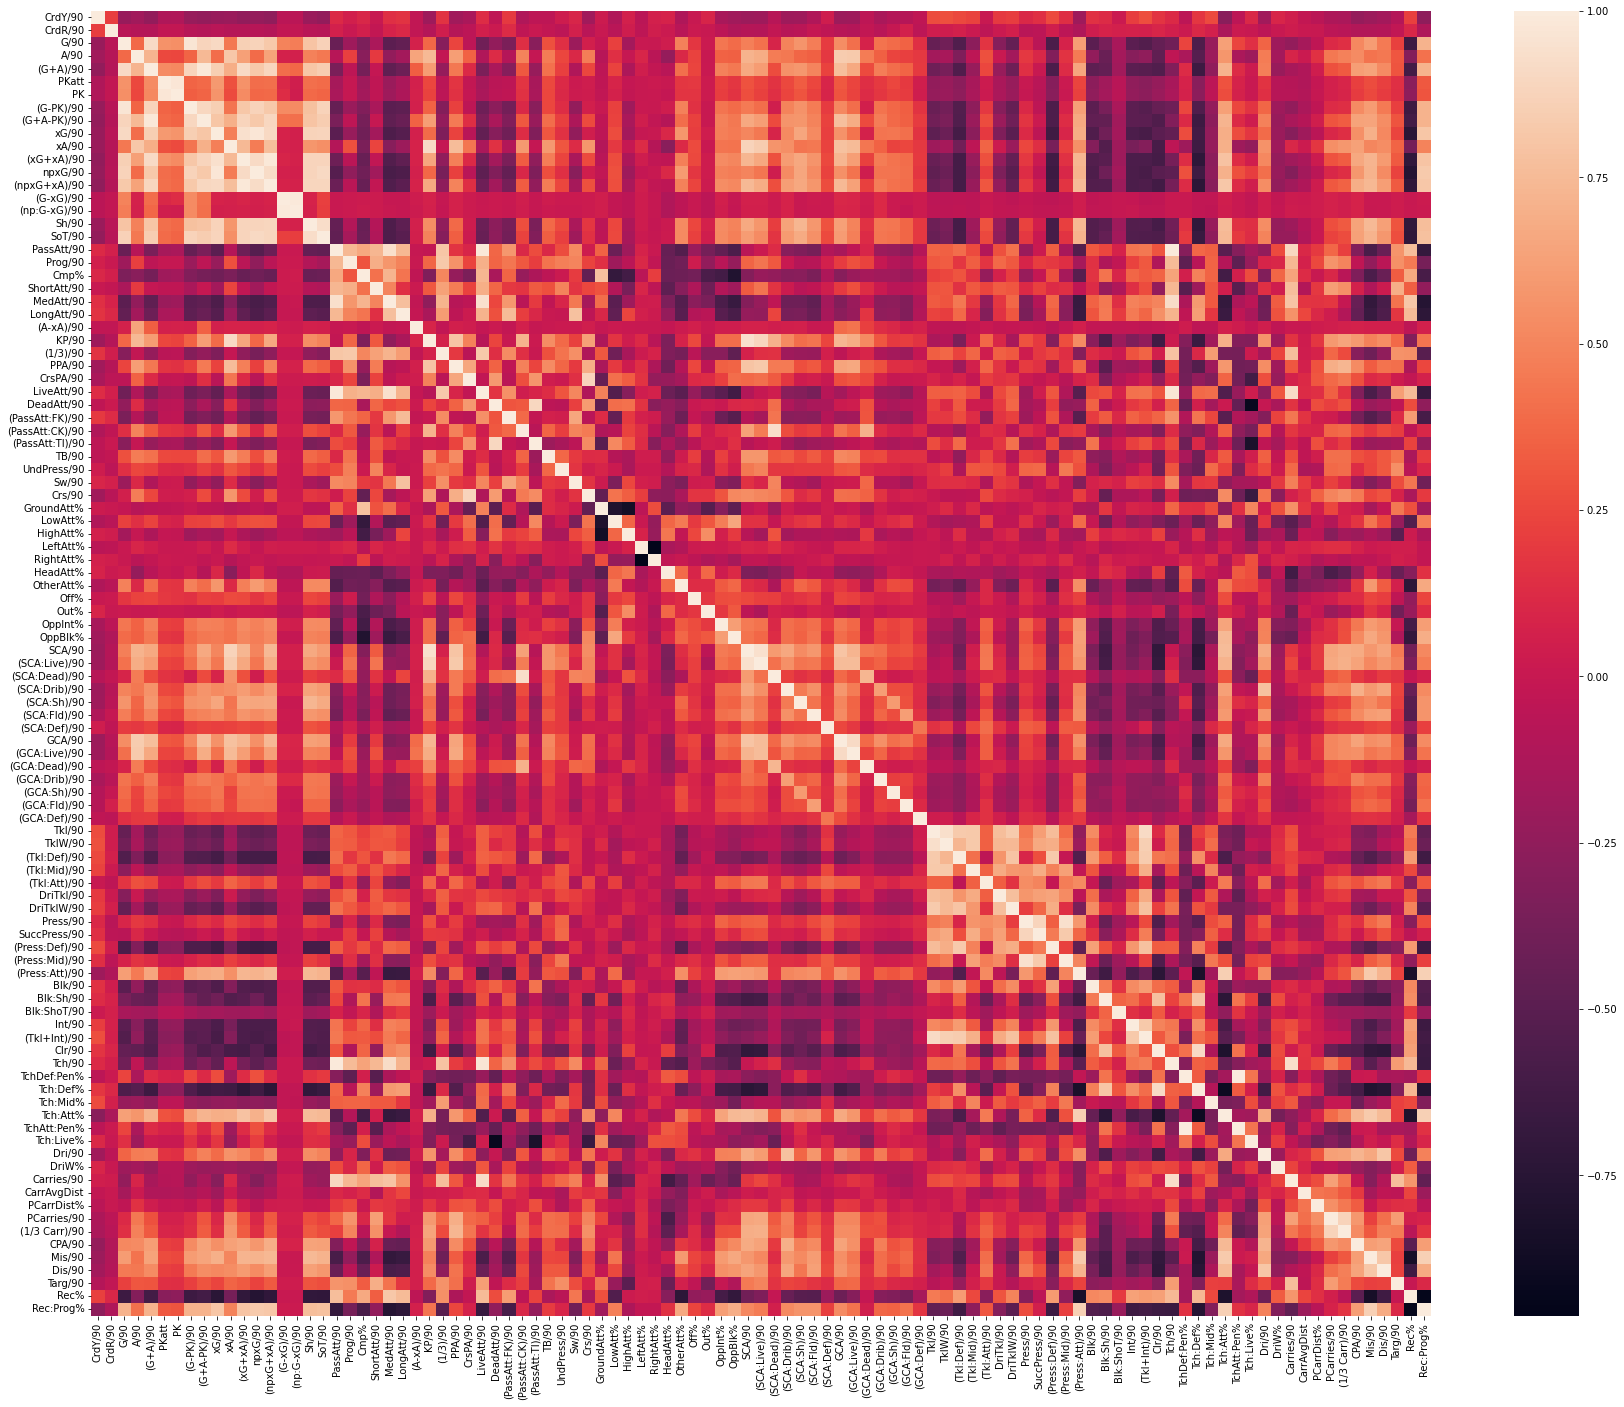

In [49]:
data = df.iloc[:,10:].copy()

corr = data.corr()
plt.figure(figsize=(30,24))
sns.heatmap(corr)

In [50]:
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = data.columns[columns]

data = data[selected_columns]

In [51]:
selected_columns

Index(['CrdY/90', 'CrdR/90', 'G/90', 'A/90', 'PKatt', 'xA/90', '(G-xG)/90',
       'Sh/90', 'PassAtt/90', 'Prog/90', 'Cmp%', 'ShortAtt/90', 'LongAtt/90',
       '(A-xA)/90', '(1/3)/90', 'PPA/90', 'CrsPA/90', 'DeadAtt/90',
       '(PassAtt:FK)/90', '(PassAtt:CK)/90', '(PassAtt:TI)/90', 'TB/90',
       'UndPress/90', 'Sw/90', 'Crs/90', 'GroundAtt%', 'LowAtt%', 'HighAtt%',
       'LeftAtt%', 'RightAtt%', 'HeadAtt%', 'OtherAtt%', 'Off%', 'Out%',
       'OppInt%', 'OppBlk%', '(SCA:Drib)/90', '(SCA:Sh)/90', '(SCA:Fld)/90',
       '(SCA:Def)/90', 'GCA/90', '(GCA:Dead)/90', '(GCA:Drib)/90',
       '(GCA:Sh)/90', '(GCA:Fld)/90', '(GCA:Def)/90', 'Tkl/90', '(Tkl:Def)/90',
       '(Tkl:Mid)/90', '(Tkl:Att)/90', 'DriTkl/90', 'DriTklW/90', 'Press/90',
       'SuccPress/90', '(Press:Def)/90', '(Press:Att)/90', 'Blk/90',
       'Blk:Sh/90', 'Blk:ShoT/90', 'Int/90', 'Clr/90', 'TchDef:Pen%',
       'Tch:Mid%', 'Tch:Att%', 'Tch:Live%', 'Dri/90', 'DriW%', 'CarrAvgDist',
       'PCarrDist%', 'PCarries/90',

In [52]:
data.shape

(1582, 77)

We have been able to reduce the number of features from 99 to 77 (without considering the 10 features related to player's name, team ecc.) thanks to correlation-based feature selection. Still, we will have to perform Principal Component Analysis to furtherly reduce the number of features without losing information.

### Principal Component Analysis
#### Standardizing the features

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [11]:
scaled_data = scaler.transform(data)

#### Creating the Principal Components

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components = 18)
pca.fit(scaled_data)
print(pca.explained_variance_ratio_)

[0.24459102 0.13485182 0.08957572 0.07263526 0.04189398 0.03398487
 0.02337812 0.02276191 0.02029406 0.01763324 0.01657045 0.01569859
 0.01485276 0.01401689 0.01308187 0.01218478 0.01179124 0.01093919]


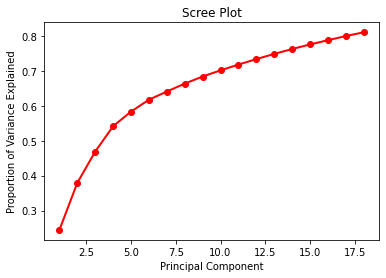

In [14]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The first 18 principal components explain around 80% of the variance created by the data. It is good practice to retain a number of principal components that guarantee this amount of explained variance.

In [15]:
pca_data = pca.transform(scaled_data)

pca_data.shape

(1582, 18)

#### Interpreting the Principal Components

We can interpret the Principal Components we have just created using their eigenvalues. A feature having high positive eigenvalue means the component has a high positive association with the component. A feature having high negative eigenvalue means the component has a high negative association with the component.

In [16]:
#PC1

pd.DataFrame(pca.components_[0], selected_columns).sort_values(by=0)

,0
Rec%,-0.195637
Clr/90,-0.177948
Blk:Sh/90,-0.160502
LongAtt/90,-0.154701
(Tkl:Def)/90,-0.149736
Int/90,-0.148409
Cmp%,-0.143174
(Press:Def)/90,-0.142522
PassAtt/90,-0.132227
Blk/90,-0.123861


PC1 seems to reward:
1. Players touching the ball in the attacking 3rd a higher % of time over total touches
2. Players receiving a higher % of progressive passes over total passes received
3. Players failing a higher number of time x90 while trying to control the ball or dismissing the possession after an opponent's tackle
4. Players applying pressure in the attacking 3rd a higher number of time x90
5. Players shooting a higher number of time x90
6. Players with a higher number of dribbling and carries inside the opponent's penalty box x90
7. Players with a higher % of passes blocked by the opponent over total passes attempted
8. Players with a higher number of goal creating actions, goals and assists x90

PC1 seems to penalize:
1. Players receiving a higher % of passes over total passes targeting them
2. Players with a higher number of clearances x90
3. Players with a higher number of shots blocked x90
4. Players with a higher number of long passes attempted x90
5. Players with a higher number of tackles and pressures applied in the defensive 3rd x90
6. Players with a higher number of interceptions x90
7. Players with a higher % of passes completed over total passes attempted
8. Players with a higher number of passes attempted x90

High values in PC1 indicate that the player mostly plays in an advanced position

In [17]:
#PC2

pd.DataFrame(pca.components_[1], selected_columns).sort_values(by=0)

,0
TchDef:Pen%,-0.206306
HeadAtt%,-0.191458
OtherAtt%,-0.147449
Tch:Live%,-0.141134
Blk:Sh/90,-0.095000
Clr/90,-0.091316
Rec:Prog%,-0.087934
Out%,-0.065914
G/90,-0.059277
Blk:ShoT/90,-0.039024


PC2 seems to reward:
1. Players producing a higher number of progressive passes x90
2. Players with a higher number of passes attempted x90 (short passes in particular)
3. Players with a higher number of progressive carries x90
4. Players with a higher number of carries inside the opponent's penalty box x90
5. Players with a higher number of passes inside the opponent's defensive 3rd and penalty box x90
6. Players with a higher number of dribblers tackled x90
7. Players with a higher number of crosses attempted x90
8. Players with a higher number of passes attempted from dead balls x90
9. Players with a higher number of passes targeting them x90
10. Players with a higher number of completed crosses into the opponent's penalty box x90

PC2 seems to penalize:
1. Players touching the ball in the defensive penalty box a higher % of time over total touches in the defensive 3rd
2. Players with a higher % of passes attempted with their head or part of the body other than their head or their feet over total passes attempted
3. Players with a higher % of touches from live ball over total touches

High PC2 values indicate that the player moves the ball towards the opponent's penalty box

In [18]:
#PC3

pd.DataFrame(pca.components_[2], selected_columns).sort_values(by=0)

,0
GroundAtt%,-0.324073
Tch:Live%,-0.263970
Cmp%,-0.234948
Targ/90,-0.221745
Tch:Mid%,-0.153977
(1/3)/90,-0.148765
RightAtt%,-0.136901
UndPress/90,-0.122595
TB/90,-0.121657
DriW%,-0.111114


PC3 seems to reward:
1. Players with a higher % of passes leaving the ground attempted over total passes attempted
2. Players with a higher number of passes attempted from dead balls (and in particular from throw ins) x90
3. Players with a higher number of crosses attempted x90
4. Players with a higher number of completed crosses into the opponent's penalty box x90
5. Players with a higher % of passes ended out of bounds over total passes attempted
6. Players with a higher % of passes blocked by an opponent over total passes attempted
7. Players with a higher number of blocks x90

PC3 seems to penalize:
1. Players with a higher % of ground passes attempted over total passes attempted
2. Players with a higher % of touches from live balls over total touches
3. Players with a higher % of completed passes over total passes attempted
4. Players with a higher number of passes targeting them x90
5. Players with a higher % of touches in the mid 3rd over total touches
6. Players with a higher % of touches with their right foot over total touches
7. Players with a higher number of passes completed under pressure x90
8. Players with a higher number of through balls x90

High PC3 values indicate that a player predominantly plays in a lateral position of the field

In [19]:
#PC4

pd.DataFrame(pca.components_[3], selected_columns).sort_values(by=0)

,0
LongAtt/90,-0.156910
CarrAvgDist,-0.142359
PCarrDist%,-0.137318
Sw/90,-0.131587
(PassAtt:FK)/90,-0.122136
(PassAtt:CK)/90,-0.121847
TchDef:Pen%,-0.113285
Clr/90,-0.112996
DeadAtt/90,-0.111034
Crs/90,-0.109303


PC4 seems to reward:
1. Players with a higher number of pressures applied x90
2. Players with a higher number of successful pressures applied x90
3. Players with a higher number of tackles in the mid 3rd x90
4. Players with a higher number of tackles x90
5. Players with a higher number of dribblers tackled x90
6. Players with a higher number of tackles in the attacking 3rd x90
7. Players with a higher number of pressures applied in the defensive 3rd x90
8. Players with a higher % of touches in the mid 3rd over total touches
9. Players with a higher number of dribblers tackled succesfully x90

PC4 seems to penalize:
1. Players with a higher number of long passes attempted x90
2. Players with a longer distance covered through carries
3. Players with a higher % of progressive distance covered through carries over total
4. Players with a higher number of passes traveling more than 40 yards x90
5. Players with a higher number of passes attempted from freekicks or corner kicks x90

High PC4 values indicate that the player mainly has defensive duties

In [20]:
#PC5

pd.DataFrame(pca.components_[4], selected_columns).sort_values(by=0)

,0
PCarrDist%,-0.232891
GroundAtt%,-0.194941
CPA/90,-0.165467
Cmp%,-0.157113
PCarries/90,-0.155987
(PassAtt:TI)/90,-0.155740
CarrAvgDist,-0.147743
Dri/90,-0.144897
(1/3 Carr)/90,-0.120409
(Tkl:Def)/90,-0.094592


PC5 seems to reward:
1. Players with a higher % of high passes attempted over total passes attempted
2. Players with a higher number of passes traveling more than 40 yards x90
3. Players with a higher number of passes attempted from corner kicks and free-kicks x90
4. Players with a higher number of goal creating action from dead balls x90
5. Players with a higher number of long passes attempted x90
6. Players with a higher % of passes ended offside or out of bounds over total passes attempted
7. Players with a higher % of passes attempted using their head over total passes attempted
8. Players with a higher % of touches in the mid 3rd over total touches

PC5 seems to penalize:
1. Players with a longer distance covered through carries
2. Players with a higher % of ground passes attempted over total passes attempted
3. Players with a higher number of carries inside the opponent's penalty box x90
4. Players with a higher % of completed passes over total passes attempted
5. Players with a higher number of progressive carries x90
6. Players with a higher number of passes attempted from throw-ins x90
7. Players with a higher distance covered through carries
8. Players with a higher number of dribblings attempted x90

High PC5 values indicate that the player is a set-pieces taker and predominantly plays in the mid 3rd

In [21]:
#PC6

pd.DataFrame(pca.components_[5], selected_columns).sort_values(by=0)

,0
ShortAtt/90,-0.279656
LowAtt%,-0.227026
Targ/90,-0.215301
(PassAtt:TI)/90,-0.202394
Tch:Mid%,-0.190406
UndPress/90,-0.171402
OtherAtt%,-0.167391
PassAtt/90,-0.152090
DeadAtt/90,-0.151389
(1/3)/90,-0.149616


High PC6 values indicate that the player carries the ball over longer distances and tries to dribble more often

In [22]:
#PC7

pd.DataFrame(pca.components_[6], selected_columns).sort_values(by=0)

,0
RightAtt%,-0.658282
CrdR/90,-0.064662
CrsPA/90,-0.064398
LowAtt%,-0.056966
DeadAtt/90,-0.055114
(PassAtt:TI)/90,-0.052978
Crs/90,-0.049032
(1/3 Carr)/90,-0.036935
PPA/90,-0.034407
OppBlk%,-0.032667


High PC7 values indicate that the player is left footed

In [26]:
#PC8

pd.DataFrame(pca.components_[7], selected_columns).sort_values(by=0)

,0
CarrAvgDist,-0.233722
Out%,-0.161793
Dri/90,-0.140281
Dis/90,-0.136610
Sw/90,-0.119133
PCarries/90,-0.116362
Tch:Mid%,-0.111254
LeftAtt%,-0.107972
(1/3 Carr)/90,-0.107418
(PassAtt:CK)/90,-0.103246


In [27]:
#PC9

pd.DataFrame(pca.components_[8], selected_columns).sort_values(by=0)

,0
PCarrDist%,-0.212082
CrdR/90,-0.207977
(GCA:Sh)/90,-0.198635
(GCA:Fld)/90,-0.197704
PKatt,-0.175424
(SCA:Fld)/90,-0.171762
CrdY/90,-0.161868
Out%,-0.159021
Blk:ShoT/90,-0.150281
G/90,-0.150195


In [28]:
#PC10

pd.DataFrame(pca.components_[9], selected_columns).sort_values(by=0)

,0
(A-xA)/90,-0.361058
A/90,-0.217851
HeadAtt%,-0.204192
Out%,-0.139137
(GCA:Def)/90,-0.137963
Tch:Live%,-0.135968
GCA/90,-0.123757
UndPress/90,-0.123081
CarrAvgDist,-0.095267
Targ/90,-0.091540


In [29]:
#PC11

pd.DataFrame(pca.components_[10], selected_columns).sort_values(by=0)

,0
(GCA:Def)/90,-0.374810
(SCA:Def)/90,-0.343844
(G-xG)/90,-0.119093
CrsPA/90,-0.115446
(Tkl:Att)/90,-0.112633
PPA/90,-0.107608
Blk:ShoT/90,-0.093283
TchDef:Pen%,-0.088424
Crs/90,-0.083033
Blk:Sh/90,-0.077324


In [30]:
#PC12

pd.DataFrame(pca.components_[11], selected_columns).sort_values(by=0)

,0
(G-xG)/90,-0.261911
(A-xA)/90,-0.178211
UndPress/90,-0.161110
Off%,-0.159724
(GCA:Drib)/90,-0.144772
Out%,-0.140495
HeadAtt%,-0.136171
Tch:Live%,-0.128086
CarrAvgDist,-0.113807
G/90,-0.112833


### Appending PCs values to the main dataset and exporting it

In [23]:
PCAs = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                      'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                      'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                      'PC16', 'PC17', 'PC18'])

PCAs = PCAs.reset_index(drop=True)
info = df.iloc[:,:5].reset_index(drop=True)
stats = data.reset_index(drop=True)

final = pd.merge(pd.merge(info, stats, left_index=True, right_index=True), PCAs, left_index=True, right_index=True)

In [24]:
final.to_csv('final.csv', index=False)

In [25]:
final.head()

,Player,Nation,Pos,Squad,Comp,CrdY/90,CrdR/90,G/90,A/90,PKatt,xA/90,(G-xG)/90,Sh/90,PassAtt/90,Prog/90,Cmp%,ShortAtt/90,LongAtt/90,(A-xA)/90,(1/3)/90,PPA/90,CrsPA/90,DeadAtt/90,(PassAtt:FK)/90,(PassAtt:CK)/90,(PassAtt:TI)/90,TB/90,UndPress/90,Sw/90,Crs/90,GroundAtt%,LowAtt%,HighAtt%,LeftAtt%,RightAtt%,HeadAtt%,OtherAtt%,Off%,Out%,OppInt%,OppBlk%,(SCA:Drib)/90,(SCA:Sh)/90,(SCA:Fld)/90,(SCA:Def)/90,GCA/90,(GCA:Dead)/90,(GCA:Drib)/90,(GCA:Sh)/90,(GCA:Fld)/90,(GCA:Def)/90,Tkl/90,(Tkl:Def)/90,(Tkl:Mid)/90,(Tkl:Att)/90,DriTkl/90,DriTklW/90,Press/90,SuccPress/90,(Press:Def)/90,(Press:Att)/90,Blk/90,Blk:Sh/90,Blk:ShoT/90,Int/90,Clr/90,TchDef:Pen%,Tch:Mid%,Tch:Att%,Tch:Live%,Dri/90,DriW%,CarrAvgDist,PCarrDist%,PCarries/90,(1/3 Carr)/90,CPA/90,Mis/90,Dis/90,Targ/90,Rec%,Rec:Prog%,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,0.10,0.00,0.00,0.05,0,0.04,-0.06,0.91,57.21,5.69,78.9,25.99,7.72,0.01,3.45,1.32,0.20,9.90,1.83,0.10,7.97,0.10,5.69,1.02,1.73,63.6,19.4,16.9,65.9,17.2,2.2,0.3,1.1,2.0,2.6,3.0,0.05,0.00,0.00,0.00,0.15,0.05,0.0,0.00,0.00,0.00,1.68,1.07,0.56,0.05,2.13,0.76,10.46,3.50,6.60,1.02,1.57,0.36,0.05,1.73,2.03,11.0,46.2,24.7,80.9,1.07,42.9,4.80,54.1,5.79,1.52,0.46,0.66,0.81,42.39,92.8,5.9,-2.012856,2.428500,2.896428,-1.534773,-0.378665,-1.611102,0.963799,-0.057082,-0.060940,-0.178662,0.606282,-0.458054,0.592757,-1.552984,-0.364394,2.497688,1.177566,1.679215
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,0.12,0.03,0.09,0.00,0,0.01,0.04,0.47,53.43,2.83,87.8,11.74,11.40,-0.01,2.52,0.03,0.00,1.84,1.84,0.00,0.00,0.00,5.23,1.21,0.00,79.6,7.2,13.2,66.2,27.7,3.3,0.2,0.2,1.5,1.4,0.8,0.00,0.03,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.21,1.59,0.62,0.00,1.15,0.47,11.81,4.55,7.85,0.53,1.59,0.62,0.06,1.74,5.30,51.2,44.2,1.8,91.0,0.62,60.0,5.65,55.4,1.81,0.25,0.03,0.25,0.47,43.83,97.0,0.5,-5.774046,-2.341719,-1.193082,-1.010622,-1.012041,1.659007,2.260379,0.313944,-0.027464,0.809701,0.147632,0.009211,1.026554,-1.390060,-0.671135,-0.141376,1.656424,0.826462
2,Mehdi Abeid,ALG,MF,Nantes,Ligue 1,0.34,0.00,0.00,0.00,0,0.05,-0.07,1.36,49.32,2.86,85.0,17.89,10.48,-0.05,4.08,0.48,0.27,3.33,2.18,0.95,0.20,0.07,5.65,2.24,1.43,75.0,9.7,15.3,13.8,81.2,2.6,0.6,0.7,2.1,1.4,1.0,0.14,0.00,0.14,0.14,0.07,0.00,0.0,0.00,0.00,0.00,2.52,1.09,1.22,0.20,1.70,0.75,16.67,5.78,5.10,2.52,1.22,0.14,0.00,1.56,0.95,7.5,58.1,18.4,87.0,2.18,71.9,5.86,48.5,4.08,1.50,0.07,0.41,1.22,42.72,90.0,2.5,-2.462222,1.650985,-1.242429,1.872012,0.885623,0.955636,-0.813256,-2.362629,-0.011779,0.337752,-0.019165,0.797022,-0.647700,1.003861,0.193665,0.551288,-0.566733,0.034401
3,Laurent Abergel,FRA,MF,Lorient,Ligue 1,0.15,0.00,0.09,0.03,0,0.04,0.05,0.91,48.39,3.37,83.5,18.33,8.78,-0.01,3.43,0.52,0.12,1.40,1.12,0.03,0.21,0.06,9.70,1.61,0.55,73.7,12.4,13.8,8.6,87.4,2.8,0.3,0.3,1.8,3.1,1.8,0.03,0.15,0.12,0.15,0.30,0.03,0.0,0.03,0.03,0.03,4.86,1.98,2.40,0.49,5.44,1.61,29.12,8.18,9.82,2.92,1.55,0.18,0.03,1.40,0.40,5.5,60.7,14.8,92.4,0.94,71.0,4.25,49.9,3.25,1.03,0.09,1.25,1.40,43.37,92.6,3.6,-2.498745,4.029056,-1.236825,8.821702,0.870322,2.192025,0.278392,1.688389,-0.410914,1.166803,-1.047924,0.357922,0.603585,0.684479,0.619551,0.405035,1.339476,0.225790
4,Charles Abi,FRA,"FW,MF",Saint-Étienne,Ligue 1,0.10,0.00,0.30,0.20,0,0.03,0.09,1.87,21.19,1.09,67.3,10.79,1.98,0.17,0.89,0.50,0.00,1.49,0.00,0.00,0.00,0.10,7.62,0.20,0.40,65.4,15.4,19.2,66.4,12.1,7.5,1.4,0.0,3.3,0.5,6.5,0.10,0.00,0.10,0.00,0.20,0.00,0.0,0.00,0.00,0.00,0.69,0.59,0.10,0.00,1.39,0.50,22.18,5.64,2.38,9.31,0.69,0.10,0.00,0.69,0.59,27.8,45.3,43.4,90.7,2.67,44.4,4.63,52.1,2.67,1.09,0.40,3.47,2.48,48.71,51.4,26.1,4.642403,-3.966764,0.574665,1.340748,0.014279,-0.575709,2.050580,-0.224738,2.605065,-0.827690,0.648393,-2.133291,-1.320086,-0.350795,0.168052,-1.723835,2.196716,-0.588895
